In [109]:
# Linear Regression

In [110]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [111]:
# Importing the dataset
df = pd.read_csv('flats_prep.csv', sep=';')

In [112]:
df

,rooms,location,condition,m2,type,price
0,2.0,1,0,50,1,35000.0
1,1.0,0,0,37,1,35000.0
2,3.0,1,0,67,1,65000.0
3,2.0,1,0,21,1,15000.0
4,1.0,1,0,82,0,60000.0
...,...,...,...,...,...,...
212,2.0,0,1,65,0,46407.0
213,3.0,0,1,84,0,57678.0
214,3.0,0,1,93,0,63513.0
215,2.0,0,1,72,0,51121.0


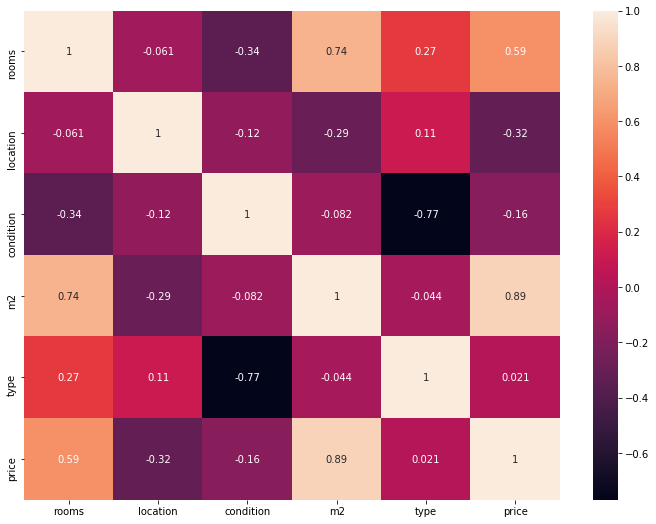

In [113]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

In [114]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, 5].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [115]:
# Fitting Simple Linear Regression to the Training set (M2)
from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[:, 3:4], y_train)

In [116]:
# Getting parameters
sr.coef_, sr.intercept_

(array([1512.79256919]), -34988.85064159789)

In [117]:
# Predicting the Test set results
y_pred = sr.predict(X_test[:, 3:4])

In [118]:
# Coefficient of determination R^2
sr.score(X_train[:, 3:4], y_train), sr.score(X_test[:, 3:4], y_test)

(0.7880108288096984, 0.7587056483111766)

In [119]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[:, 3:4])), mean_squared_error(y_test, y_pred)

(785684767.9403967, 699203285.14924)

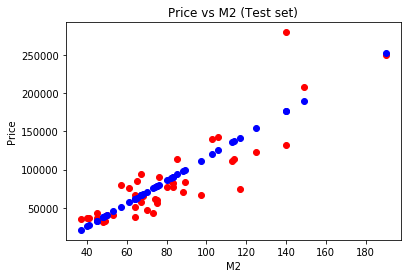

In [120]:
# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], sr.predict(X_test[:, 3:4]), 'bo')
plt.title('Price vs M2 (Test set)')
plt.xlabel('M2')
plt.ylabel('Price')
plt.show()

In [121]:
# Multiple Linear Regression, checking p-values
import statsmodels.api as sm
X = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X).fit()
#mr1.pvalues
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     160.0
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           9.32e-62
Time:                        14:42:15   Log-Likelihood:                -1999.5
No. Observations:                 173   AIC:                             4011.
Df Residuals:                     167   BIC:                             4030.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5021.8321   9283.167     -0.541      0.589   -2.33e+04    1.33e+04
x1         -2.122e+04   4152.321     -5.111      0.000   -2.94e+04    -1.3e+04
x2         -4914.3517   4796.103     -1.025      0.307   -1.44e+04    4554.455
x3         -2.278e+04   7047.748     -3.232      0.001   -3.67e+04   -8866.802
x4          1916.6292    108.509     17.663      0.000    1702.403    2130.856
x5          5304.4053   7765.518      0.683      0.496      -1e+04    2.06e+04
==============================================================================
Omnibus:                       64.242   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              397.151
Skew:                          -1.202   Prob(JB):                     5.75e-87
Kurtosis:                      10.022   Cond. No.                         527.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
# Backward Elimination with p-values
def backwardElimination(x, sl):
    x = sm.add_constant(x)
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x

import statsmodels.api as sm         
SL = 0.05
X_opt = X_train
y = y_train
X_Modeled = backwardElimination(X_opt, SL)

In [123]:
X_train = X_train[:, [0, 2, 3]]
X_test = X_test[:, [0, 2, 3]]

In [124]:
# Fitting Optimized Multiple Regression to the Training set
mr = LinearRegression().fit(X_train, y_train)

In [125]:
# Getting parameters
mr.coef_, mr.intercept_

(array([-21349.26734689, -25702.55454637,   1931.09837   ]),
 -3955.4323757115926)

In [126]:
# Predicting the Test set results
y_pred = mr.predict(X_test)

In [127]:
# Coefficient of determination R^2
mr.score(X_train, y_train), mr.score(X_test, y_test)

(0.82554483008073, 0.7046720383161978)

In [128]:
# Mean squared error
mean_squared_error(y_train, mr.predict(X_train)), mean_squared_error(y_test, y_pred)

(646574393.0428408, 855777516.3839778)

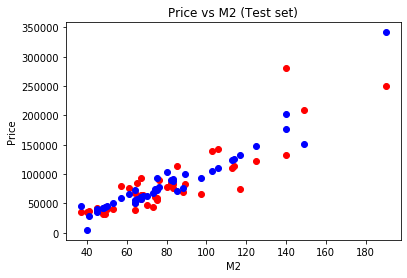

In [129]:
# Visualising the Test set results
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], mr.predict(X_test), 'bo')
plt.title('Price vs M2 (Test set)')
plt.xlabel('M2')
plt.ylabel('Price')
plt.show()

In [130]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train)
X_test_p = PolynomialFeatures().fit_transform(X_test)
pr = LinearRegression().fit(X_train_p[:,1:], y_train)

In [131]:
# Getting parameters
pr.coef_, pr.intercept_

(array([ 1.60113049e+04,  3.92335312e+03,  6.17872918e+02,  1.43843497e+03,
        -4.46242222e+03, -4.50461496e+02,  3.92335312e+03, -1.87661917e+02,
         1.31971076e+01]),
 -7900.676096163821)

In [132]:
# Predicting the Test set results
y_pred = pr.predict(X_test_p[:,1:])

In [133]:
# Coefficient of determination R^2
pr.score(X_train_p[:,1:], y_train), pr.score(X_test_p[:,1:], y_test)

(0.859590533674672, 0.19412653911374103)

In [134]:
# Mean squared error
mean_squared_error(y_train, pr.predict(X_train_p[:,1:])), mean_squared_error(y_test, y_pred)

(520392519.80196077, 2335195031.804631)

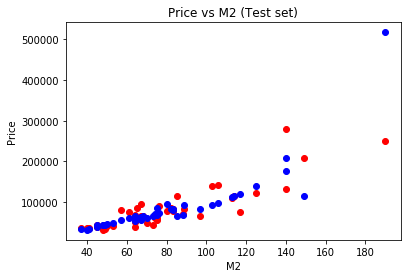

In [135]:
# Visualising the Test set results
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], pr.predict(X_test_p[:,1:]), 'bo')
plt.title('Price vs M2 (Test set)')
plt.xlabel('M2')
plt.ylabel('Price')
plt.show()

In [136]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('data_reg.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()